In [76]:
'''
Sneha Nair
260850706
Phys 432- Fluids Assignment 2
'''

## Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.figure_factory as ff

In [37]:
'''
The first thing I would like to do is establisbh the necessary variables I will be working with.
'''
dt = 1
Nsteps = 60

In [208]:
## Setting the intial conditions for the vortex center and circulation
y_v=np.array([5,5,9,9])
x_v=np.array([5,9,5,9])
k_v=np.array([1,1,-1,-1])

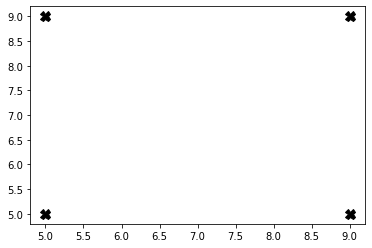

In [211]:
#Intial Plot of the Vortices
plt.ion()
fig, ax = plt.subplots(1,1)
p, = ax.plot(x_v,y_v, 'kX', markersize=10)


#Intial velocity streamline
ngrid = 2
Y, X = np.mgrid[4:14:360j,4:20:360j]

vel_x=np.zeros(np.shape(Y))
vel_y=np.zeros(np.shape(Y))

#Establishing our Masking Radius
r_mask = 1


In [232]:
## I want to compute the velocity field on the meshgrid

def compute_velocity(X_i,Y_i,x_vi,y_vi,kval):
    distance = np.sqrt((x_vi-X_i)**2+(y_vi-Y_i)**2)
    mag= kval/distance
    u_y = -mag*(x_vi-X_i)/distance
    u_x = mag*(y_vi-Y_i)/distance
    return (u_x,u_y)

# Now after computing the velocities I would like to then loop through each vortex

def loop_vortex(Xgrid,Ygrid,x_v,y_v,k_v,mask):
    output_x =np.zeros(np.shape(X))
    output_y= np.zeros(np.shape(Y))
    for i in range(len(x_v)):
        for j in range(len(Xgrid)):
            for k in range(len(Ygrid)):
                X_gridval = Xgrid[j]
                Y_gridval = Ygrid[k]
                x_vi = x_v[i]
                y_vi = y_v[i]
                k_val = k_v[i]
                result = compute_velocity(X_gridval,Y_gridval,x_vi,y_vi,k_val)
                distance =  np.sqrt((x_v[i]-j)**2+(y_v[i]-k)**2)
                output_x[k][j] += result[0]
                output_y[k][j] += result[1]
                if distance <= mask:
                    output_x[k][j] = float('nan')
                    output_y[k][j] = float('nan')
    return (output_x,output_y)
    
# After we have looped through each vortex let us design how we are going to advance the vortices.

def advance_vortex(x_curr,y_curr,x_vel,y_vel,time):
    newx = 
    newy =
    

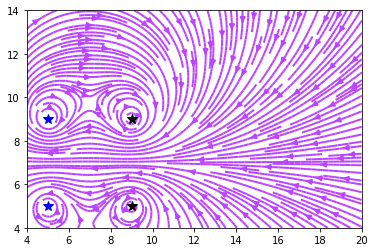

In [236]:
#Looking at the vortex for starting time.
x,y = loop_vortex(X[0], Y[:,0], x_v, y_v, k_v, r_mask)
plt.plot(x_v[0], y_v[0], 'b*', markersize=10)
plt.plot(x_v[1], y_v[1], 'k*', markersize=10)
plt.plot(x_v[2], y_v[2], 'b*', markersize=10)
plt.plot(x_v[3], y_v[3], 'k*', markersize=10)
plt.streamplot(X,Y,x,y,density=[2,2],color=y,linewidth=2, cmap='cool')